In [77]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

## Client profile data

In [141]:
df_client = pd.read_csv('https://raw.githubusercontent.com/data-bootcamp-v4/lessons/refs/heads/main/5_6_eda_inf_stats_tableau/project/files_for_project/df_final_demo.txt')

In [142]:
df_client.head()

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0


In [143]:
df_client.shape

(70609, 9)

In [144]:
df_client.columns

Index(['client_id', 'clnt_tenure_yr', 'clnt_tenure_mnth', 'clnt_age', 'gendr',
       'num_accts', 'bal', 'calls_6_mnth', 'logons_6_mnth'],
      dtype='object')

In [145]:
# Renaming columns for better readability
df_client.rename(columns={'gendr':'gender',
                          'clnt_tenure_yr':'client_tenure_year',
                          'clnt_tenure_mnth':'client_tenure_month',
                          'clnt_age':'client_age',
                          'num_accts':'number_of_accounts',
                          'calls_6_mnth':'calls_6_month',
                          'logons_6_mnth':'logos_6_month',
                          'bal':'balance'},inplace=True)
df_client.head()

,client_id,client_tenure_year,client_tenure_month,client_age,gender,number_of_accounts,balance,calls_6_month,logos_6_month
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0


In [146]:
df_client.dtypes

client_id                int64
client_tenure_year     float64
client_tenure_month    float64
client_age             float64
gender                  object
number_of_accounts     float64
balance                float64
calls_6_month          float64
logos_6_month          float64
dtype: object

In [147]:
missing_values = df_client.isnull().sum()
print(f"Missing values in each column: {missing_values}")

Missing values in each column: client_id               0
client_tenure_year     14
client_tenure_month    14
client_age             15
gender                 14
number_of_accounts     14
balance                14
calls_6_month          14
logos_6_month          14
dtype: int64


In [148]:
df_client.duplicated().any()

False

In [149]:
df_client.describe()

,client_id,client_tenure_year,client_tenure_month,client_age,number_of_accounts,balance,calls_6_month,logos_6_month
count,7.060900e+04,70595.000000,70595.000000,70594.000000,70595.000000,7.059500e+04,70595.000000,70595.000000
mean,5.004992e+06,12.052950,150.659367,46.442240,2.255528,1.474452e+05,3.382478,5.566740
std,2.877278e+06,6.871819,82.089854,15.591273,0.534997,3.015087e+05,2.236580,2.353286
min,1.690000e+02,2.000000,33.000000,13.500000,1.000000,1.378942e+04,0.000000,1.000000
25%,2.519329e+06,6.000000,82.000000,32.500000,2.000000,3.734683e+04,1.000000,4.000000
50%,5.016978e+06,11.000000,136.000000,47.000000,2.000000,6.333290e+04,3.000000,5.000000
75%,7.483085e+06,16.000000,192.000000,59.000000,2.000000,1.375449e+05,6.000000,7.000000
max,9.999839e+06,62.000000,749.000000,96.000000,8.000000,1.632004e+07,7.000000,9.000000


In [150]:
# Null values in the dataset
df_client.isna().sum()
display(df_client[df_client.isna().any(axis=1)])

,client_id,client_tenure_year,client_tenure_month,client_age,gender,number_of_accounts,balance,calls_6_month,logos_6_month
4164,7402828,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8316,355337,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8677,8412164,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9583,4666211,8.0,106.0,NaN,F,2.0,42550.55,4.0,7.0
13444,2222915,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18066,4876926,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25961,5277910,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28432,7616759,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35323,8191345,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43518,1227228,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [151]:
# Check how many values: U, X
df_client['gender'].value_counts()

gender
U    24122
M    23724
F    22746
X        3
Name: count, dtype: int64

In [152]:
# Convert numeric-like columns
num_cols = ['balance','client_age', 'client_tenure_month','client_tenure_year','number_of_accounts',
            'calls_6_month','logons_6_month']
for col in num_cols:
    if col in df_client.columns:
        df_client[col] = pd.to_numeric(df_client[col], errors='coerce')

In [153]:
# Fill with -1 if numeric variable or 'unknown' if categorical variable in column gender
df_client.fillna({
    'client_tenure_year': -1,
    'client_tenure_month': -1,
    'client_age':-1,
    'gender':'unknown',
    'number_of_accounts':-1,
    'balance':-1,
    'calls_6_month':-1,
    'logos_6_month':-1,},inplace=True)
df_client['gender'] = df_client['gender'].replace({'X':'unknown','U':'unknown'})

In [154]:
# Calculate the mean age (ignoring NaN automatically)
mean_age = df_client['client_age'].mean()

# Replace missing values with the mean
df_client['client_age'] = df_client['client_age'].fillna(mean_age)

In [155]:
df_client

,client_id,client_tenure_year,client_tenure_month,client_age,gender,number_of_accounts,balance,calls_6_month,logos_6_month
0,836976,6.0,73.0,60.5,unknown,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,unknown,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,unknown,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0
...,...,...,...,...,...,...,...,...,...
70604,7993686,4.0,56.0,38.5,unknown,3.0,1411062.68,5.0,5.0
70605,8981690,12.0,148.0,31.0,M,2.0,101867.07,6.0,6.0
70606,333913,16.0,198.0,61.5,F,2.0,40745.00,3.0,3.0
70607,1573142,21.0,255.0,68.0,M,3.0,475114.69,4.0,4.0


In [156]:
df_client['client_tenure_year'].value_counts()

client_tenure_year
 6.0     7092
 5.0     6955
 7.0     4955
 4.0     4687
 15.0    4564
 8.0     4045
 14.0    3646
 12.0    3631
 13.0    3607
 9.0     3357
 11.0    2920
 10.0    2775
 16.0    2714
 21.0    2257
 20.0    1580
 22.0    1492
 17.0    1373
 23.0    1279
 18.0    1206
 19.0    1153
 24.0     846
 26.0     660
 27.0     632
 28.0     507
 25.0     484
 3.0      449
 29.0     309
 30.0     303
 33.0     206
 32.0     191
 34.0     175
 31.0     166
 35.0     102
 2.0       81
 36.0      36
 37.0      35
 38.0      33
 48.0      16
-1.0       14
 39.0       9
 40.0       9
 55.0       9
 50.0       8
 42.0       6
 47.0       6
 43.0       6
 46.0       5
 51.0       5
 49.0       4
 44.0       3
 52.0       2
 54.0       1
 41.0       1
 45.0       1
 62.0       1
Name: count, dtype: int64

In [157]:
df_client['client_age'].value_counts()

client_age
58.5    859
55.5    830
29.5    829
28.5    827
57.5    826
       ... 
96.0      2
14.0      2
95.5      1
94.5      1
13.5      1
Name: count, Length: 166, dtype: int64

In [158]:
df_client['client_age'].value_counts()

client_age
58.5    859
55.5    830
29.5    829
28.5    827
57.5    826
       ... 
96.0      2
14.0      2
95.5      1
94.5      1
13.5      1
Name: count, Length: 166, dtype: int64

In [159]:
df_client['gender'].value_counts()

gender
unknown    24139
M          23724
F          22746
Name: count, dtype: int64

#### Univariate Analysis

In [160]:
df_client.nunique()

client_id              70609
client_tenure_year        55
client_tenure_month      483
client_age               166
gender                     3
number_of_accounts         9
balance                70329
calls_6_month              9
logos_6_month             10
dtype: int64

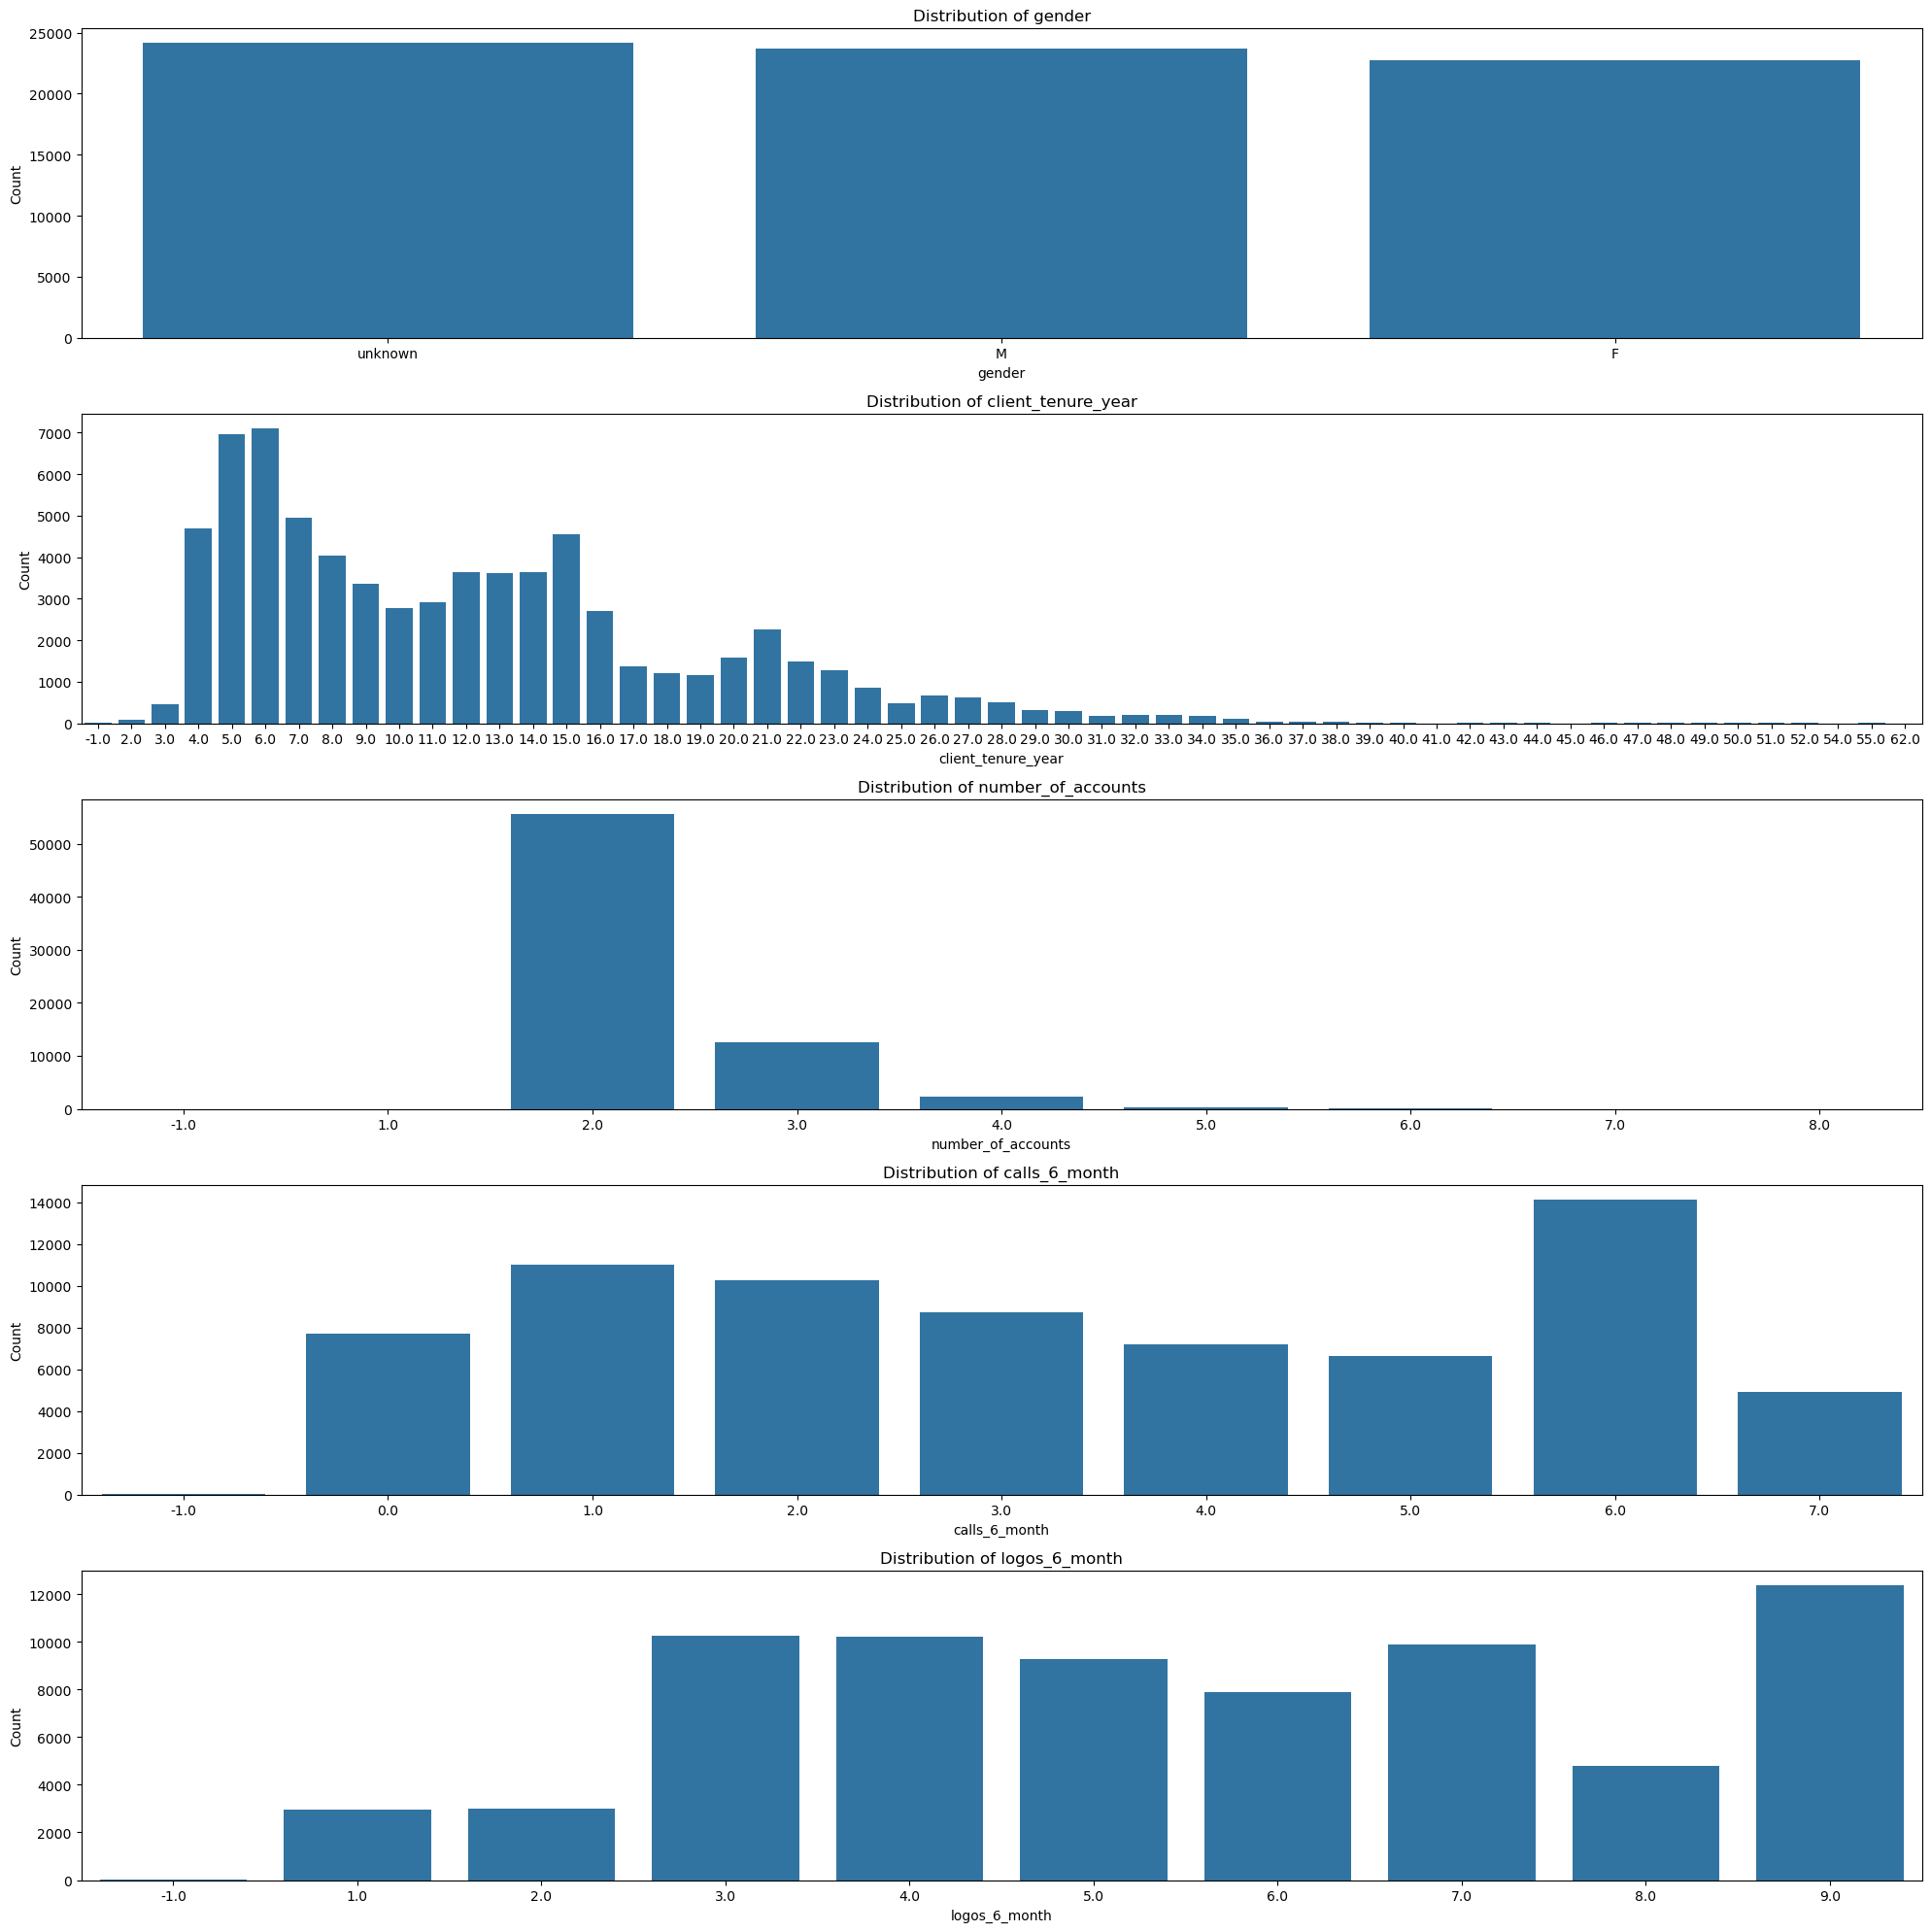

In [161]:
# Barplot for categorical variables + numeric discrete variables 

categorical_cols = ['gender', 'client_tenure_year', 'number_of_accounts','calls_6_month','logos_6_month']

fig, axes = plt.subplots(nrows=len(categorical_cols), ncols=1, figsize=(20, 4*len(categorical_cols)))

for i, col in enumerate(categorical_cols):
    sns.countplot(data=df_client, x=col, ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")
    axes[i].set_ylabel("Count")
    axes[i].set_xlabel(col)

plt.tight_layout()
plt.show()

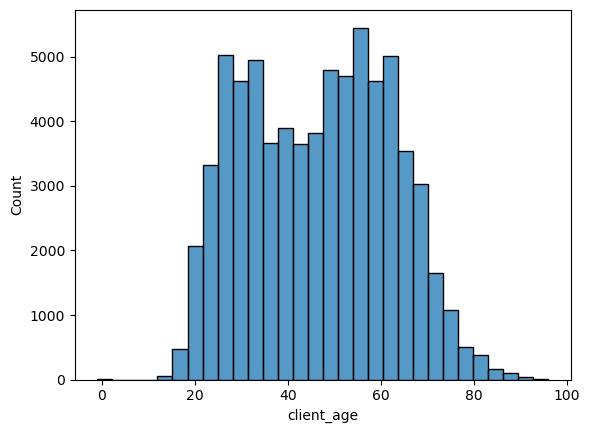

In [162]:
# Histogram for numeric continuous variables: client_age
sns.histplot(df_client['client_age'],bins=30) 
plt.show()

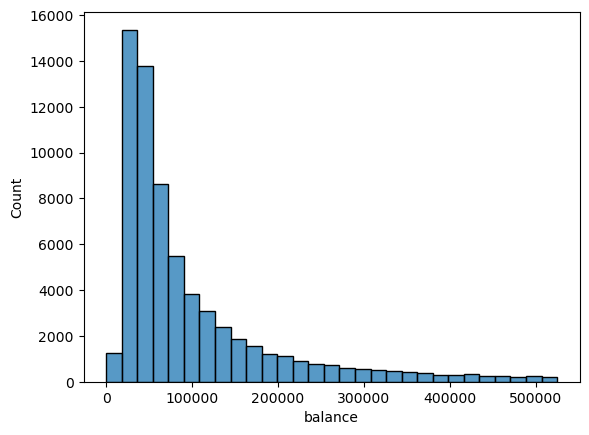

In [163]:
# Histogram for numeric continuous variables: balance as quantile binning
p95_balance = df_client['balance'].quantile(0.95)

balance_below_95 = df_client[df_client['balance'] <= p95_balance]['balance']
balance_below_95

bin_edges = np.linspace(balance_below_95.min(),balance_below_95.max(),30)

sns.histplot(df_client['balance'],bins=bin_edges )  

plt.show()

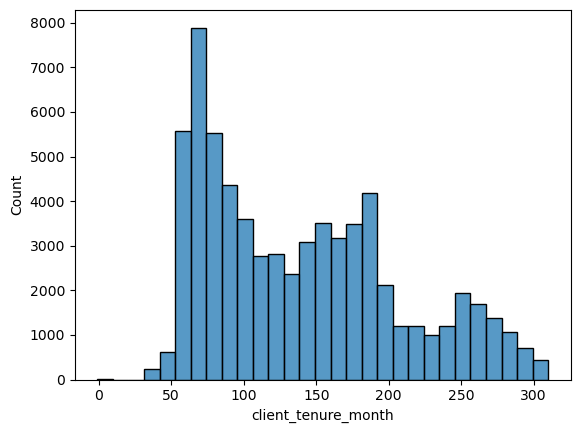

In [164]:
# Histogram for numeric continuous variables: client_tenure_month as quantile binning 
p95_month = df_client['client_tenure_month'].quantile(0.95)

balance_below_95 = df_client[df_client['client_tenure_month'] <= p95_month]['client_tenure_month']
balance_below_95

bin_edges = np.linspace(balance_below_95.min(),balance_below_95.max(),30)

sns.histplot(df_client['client_tenure_month'],bins=bin_edges )  

plt.show()


#### Bivariate analysis

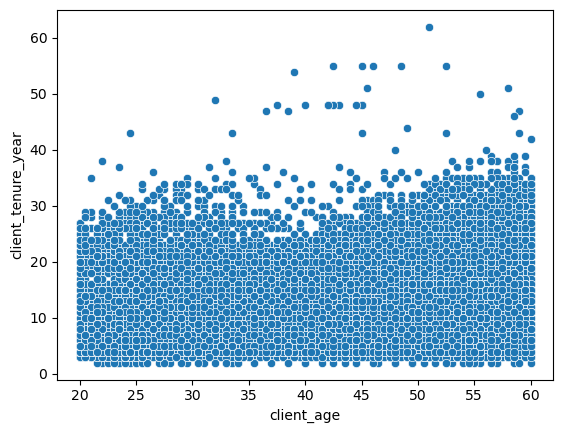

In [165]:
# age - tenure year relationship
df_primary_client = df_client[(df_client['client_age']>=20)& (df_client['client_age'] <= 60)]
sns.scatterplot(data = df_primary_client, x = 'client_age',y = 'client_tenure_year')
plt.show()

## Digital Footprints data

In [166]:
df_footprints_1 = pd.read_csv('https://raw.githubusercontent.com/data-bootcamp-v4/lessons/refs/heads/main/5_6_eda_inf_stats_tableau/project/files_for_project/df_final_web_data_pt_1.txt')
df_footprints_2 = pd.read_csv('https://raw.githubusercontent.com/data-bootcamp-v4/lessons/refs/heads/main/5_6_eda_inf_stats_tableau/project/files_for_project/df_final_web_data_pt_2.txt')

In [167]:
df_footprints_1.columns, df_footprints_2.columns

(Index(['client_id', 'visitor_id', 'visit_id', 'process_step', 'date_time'], dtype='object'),
 Index(['client_id', 'visitor_id', 'visit_id', 'process_step', 'date_time'], dtype='object'))

In [168]:
# Merging the two footprints dataframes
df_footprints_combined = pd.concat([df_footprints_1,df_footprints_2],ignore_index=True)

In [169]:
df_footprints_combined.head()

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04


In [170]:
df_footprints_combined.shape

(755405, 5)

In [171]:
df_footprints_combined.columns

Index(['client_id', 'visitor_id', 'visit_id', 'process_step', 'date_time'], dtype='object')

In [172]:
df_footprints_combined.dtypes

client_id        int64
visitor_id      object
visit_id        object
process_step    object
date_time       object
dtype: object

In [173]:
missing_values = df_footprints_combined.isnull().sum()
print(f"Missing values in each column: {missing_values}")

Missing values in each column: client_id       0
visitor_id      0
visit_id        0
process_step    0
date_time       0
dtype: int64


In [174]:
df_footprints_combined.duplicated().sum()

10764

In [175]:
df_footprints_combined.nunique()

client_id       120157
visitor_id      130236
visit_id        158095
process_step         5
date_time       629363
dtype: int64

In [176]:
df_footprints_combined.describe()

,client_id
count,7.554050e+05
mean,5.013632e+06
std,2.879152e+06
min,1.690000e+02
25%,2.519882e+06
50%,5.033441e+06
75%,7.496063e+06
max,9.999875e+06


In [177]:
df_footprints_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 755405 entries, 0 to 755404
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   client_id     755405 non-null  int64 
 1   visitor_id    755405 non-null  object
 2   visit_id      755405 non-null  object
 3   process_step  755405 non-null  object
 4   date_time     755405 non-null  object
dtypes: int64(1), object(4)
memory usage: 28.8+ MB


In [178]:
# Drop duplicate rows
df_footprints_combined.drop_duplicates(inplace=True)

In [179]:
# Explore the date_time range
df_footprints_combined['date_time'].min(),df_footprints_combined['date_time'].max()

('2017-03-15 00:03:03', '2017-06-20 23:59:57')

In [180]:
# Ensure we have datetimes for the main footprints dataframe
df_footprints_combined['date_time'] = pd.to_datetime(df_footprints_combined['date_time'], utc=True, errors='coerce').dt.tz_convert('Europe/Amsterdam')

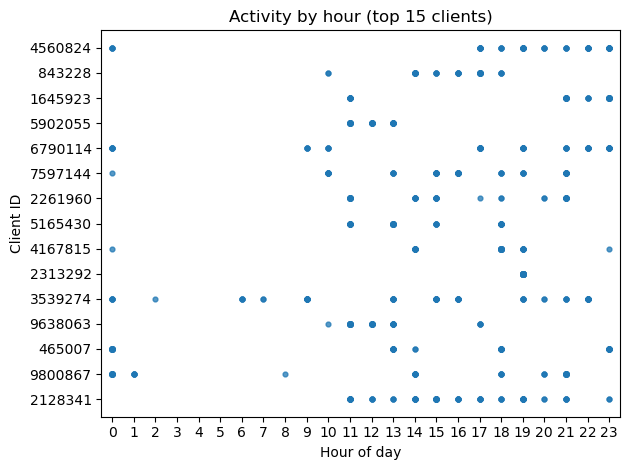

Top clients used: [2128341, 9800867, 465007, 9638063, 3539274, 2313292, 4167815, 5165430, 2261960, 7597144, 6790114, 5902055, 1645923, 843228, 4560824]


In [181]:
# Event dots for the top 15 clients

def plot_client_event_dots_hour(df, top_n=15, tz='Europe/Amsterdam'):
    d = df.dropna(subset=['client_id','process_step']).copy()
    d['date_time'] = pd.to_datetime(d['date_time'], utc=True, errors='coerce')
    d = d.dropna(subset=['date_time'])
    if tz:
        d['date_time'] = d['date_time'].dt.tz_convert(tz)

    top_clients = d['client_id'].value_counts().head(top_n).index.tolist()
    dd = d[d['client_id'].isin(top_clients)].copy()
    order = {cid:i for i, cid in enumerate(top_clients)}
    dd['client_row'] = dd['client_id'].map(order)
    dd['hour'] = dd['date_time'].dt.hour

    fig, ax = plt.subplots()
    ax.scatter(dd['hour'], dd['client_row'], s=12, alpha=0.75)
    ax.set_xticks(range(24))
    ax.set_xlim(-0.5, 23.5)
    ax.set_yticks(range(len(top_clients)))
    ax.set_yticklabels([str(c) for c in top_clients])  # <-- show real client IDs
    ax.set_xlabel('Hour of day'); ax.set_ylabel('Client ID')
    ax.set_title(f'Activity by hour (top {len(top_clients)} clients)')
    fig.tight_layout(); plt.show()

plot_client_event_dots_hour(df_footprints_combined, top_n=15)
print("Top clients used:", df_footprints_combined['client_id'].value_counts().head(15).index.tolist())

Step counts length: 5


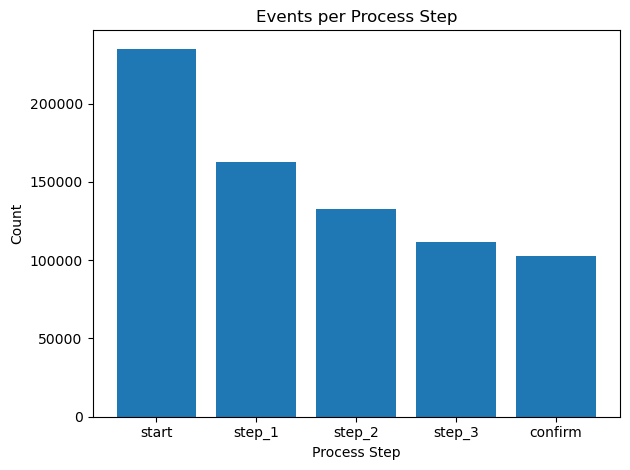

In [182]:
#Step counts barplot

if 'process_step' in df_footprints_combined.columns:
    step_counts = df_footprints_combined['process_step'].astype(str).value_counts()
    print("Step counts length:", len(step_counts))
    if len(step_counts) > 0:
        plt.figure()
        plt.bar(step_counts.index, step_counts.values)
        plt.title('Events per Process Step')
        plt.xlabel('Process Step'); plt.ylabel('Count')
        plt.xticks(rotation=0)
        plt.tight_layout(); plt.show()
    else:
        print("process_step exists but has no values.")
else:
    print("No 'process_step' column found.")

## Experiment data

In [183]:

df_experiments = pd.read_csv('https://raw.githubusercontent.com/data-bootcamp-v4/lessons/refs/heads/main/5_6_eda_inf_stats_tableau/project/files_for_project/df_final_experiment_clients.txt')

In [184]:
df_experiments.columns

Index(['client_id', 'Variation'], dtype='object')

In [185]:
# Lowercase column names
df_experiments.columns = df_experiments.columns.str.lower().str.strip()

In [186]:
df_experiments.head()

,client_id,variation
0,9988021,Test
1,8320017,Test
2,4033851,Control
3,1982004,Test
4,9294070,Control


In [187]:
df_experiments.dtypes

client_id     int64
variation    object
dtype: object

In [188]:
missing_values = df_experiments.isnull().sum()
print(f"Missing values in each column: {missing_values}")

Missing values in each column: client_id        0
variation    20109
dtype: int64


In [189]:
df_experiments.duplicated().sum()

0

In [190]:
df_experiments.nunique()

client_id    70609
variation        2
dtype: int64

In [191]:
df_experiments.describe()

,client_id
count,7.060900e+04
mean,5.004992e+06
std,2.877278e+06
min,1.690000e+02
25%,2.519329e+06
50%,5.016978e+06
75%,7.483085e+06
max,9.999839e+06


In [192]:
df_experiments.isna().sum()
display(df_experiments[df_experiments.isna().any(axis=1)])

,client_id,variation
50500,5459747,NaN
50501,8031000,NaN
50502,1847030,NaN
50503,9713157,NaN
50504,7775828,NaN
...,...,...
70604,2443347,NaN
70605,8788427,NaN
70606,266828,NaN
70607,1266421,NaN


In [193]:
# handle null values in column 'Variation', fill with 'unknown'
df_experiments.isna().sum()
df_experiments['variation_cleaned'] = df_experiments['variation'].fillna('unknown')

In [194]:
df_experiments['variation_cleaned'].value_counts()

variation_cleaned
Test       26968
Control    23532
unknown    20109
Name: count, dtype: int64

In [195]:
# Ensure client_id unique per experiment
if 'client_id' in df_experiments.columns:
    df_experiments = df_experiments.drop_duplicates(subset=['client_id'])

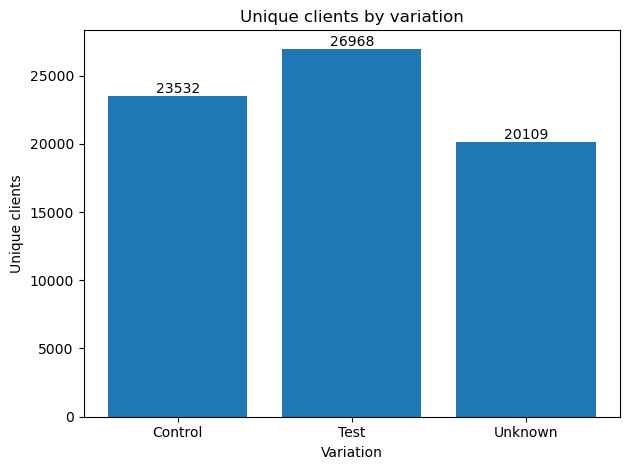

In [196]:
# Extracting client_id amount from variation columns for test and control
dfv = df_experiments[['client_id', 'variation_cleaned']].dropna(subset=['client_id','variation_cleaned']).copy()

# Standardize labels to control/test
dfv['variation_cleaned'] = (dfv['variation_cleaned'].astype(str).str.strip().str.lower()
                    .replace({'ctrl':'control','baseline':'control','a':'control',
                              'treat':'test','treatment':'test','b':'test'}))

# Unique clients per variant
counts = (dfv.groupby('variation_cleaned')['client_id']
            .nunique()
            .reindex(['control','test', 'unknown'])
            .fillna(0)
            .astype(int))

# Plot
plt.figure()
plt.bar(counts.index.str.title(), counts.values)
for i, v in enumerate(counts.values):
    plt.text(i, v, f'{v}', ha='center', va='bottom')
plt.title('Unique clients by variation')
plt.xlabel('Variation'); plt.ylabel('Unique clients')
plt.tight_layout(); plt.show()

## Combined Data Sets

In [197]:
# Digital footprint is the main table , merge 3 datasets

df_final = (df_footprints_combined
            .merge(df_experiments, on='client_id', how='left')
            .merge(df_client, on='client_id', how='left'))

In [198]:
df_final.isna().mean().sort_values(ascending=False).head(10)

variation              0.573976
variation_cleaned      0.403878
client_tenure_year     0.403878
client_tenure_month    0.403878
client_age             0.403878
gender                 0.403878
number_of_accounts     0.403878
balance                0.403878
calls_6_month          0.403878
logos_6_month          0.403878
dtype: float64

In [199]:
# Sample 5 rows from the final dataframe
display(df_final.sample(5, random_state=42))

,client_id,visitor_id,visit_id,process_step,date_time,variation,variation_cleaned,client_tenure_year,client_tenure_month,client_age,gender,number_of_accounts,balance,calls_6_month,logos_6_month
40985,4543944,218710117_4616403133,27244796_60832348765_783803,step_3,2017-04-12 13:41:39+02:00,Test,Test,7.0,88.0,25.5,M,4.0,151050.41,6.0,9.0
574236,600754,604902080_29685382850,242189606_352913766_305479,confirm,2017-05-15 16:33:20+02:00,Test,Test,8.0,106.0,44.0,F,2.0,622365.10,6.0,9.0
566209,1188009,501824971_1895985236,746149866_98899673923_753311,confirm,2017-06-02 00:17:06+02:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
340413,962501,634437827_31443261606,555478353_87824533479_692598,step_3,2017-04-24 01:54:00+02:00,NaN,unknown,5.0,70.0,19.5,unknown,3.0,23214.50,3.0,3.0
54714,8827095,224711480_1290901650,785888245_91159861417_15969,step_1,2017-04-12 09:52:46+02:00,Test,Test,17.0,215.0,48.0,M,2.0,325683.51,0.0,3.0


In [200]:
df_final.shape

(744641, 15)

In [201]:
df_final.isna().sum()

client_id                   0
visitor_id                  0
visit_id                    0
process_step                0
date_time                   0
variation              427406
variation_cleaned      300744
client_tenure_year     300744
client_tenure_month    300744
client_age             300744
gender                 300744
number_of_accounts     300744
balance                300744
calls_6_month          300744
logos_6_month          300744
dtype: int64

In [202]:
display(df_final[df_final.isna().any(axis=1)])

,client_id,visitor_id,visit_id,process_step,date_time,variation,variation_cleaned,client_tenure_year,client_tenure_month,client_age,gender,number_of_accounts,balance,calls_6_month,logos_6_month
245,8932927,485163175_18149554449,883578716_57691052399_945047,step_1,2017-04-14 00:37:49+02:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
270,1208567,490822748_12476046982,63636232_1058424732_545130,start,2017-04-24 16:03:26+02:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
356,9838496,408959474_91766774102,687233905_42314307889_453394,start,2017-03-24 22:26:14+01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
859,2353261,387293592_26815377704,269923351_29360137819_823850,step_1,2017-03-20 17:07:22+01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
860,2353261,387293592_26815377704,269923351_29360137819_823850,confirm,2017-03-20 17:05:07+01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
744636,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 20:46:10+02:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
744637,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 20:45:29+02:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
744638,9668240,388766751_9038881013,922267647_3096648104_968866,step_1,2017-05-24 20:44:51+02:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
744639,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 20:44:34+02:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [203]:
# fill all null values (clients that are in footprint but not in in client profile) 

def handle_null(col):
    if np.issubdtype(col.dtype, np.number):  # float64 columns
        return col.fillna(-1)
    elif col.dtype.kind == 'O':
        return col.fillna('unknown')
    else:
        return col

df_final = df_final.apply(handle_null)

df_final.isna().sum()

TypeError: Cannot interpret 'datetime64[ns, Europe/Amsterdam]' as a data type

In [ ]:
df_final['variation_cleaned'].value_counts()

variation_cleaned
unknown    427406
Test       176699
Control    140536
Name: count, dtype: int64

In [ ]:
display(df_final)

,client_id,visitor_id,visit_id,process_step,date_time,variation,variation_cleaned,client_tenure_year,client_tenure_month,client_age,gender,number_of_accounts,balance,calls_6_month,logos_6_month
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07,Test,Test,5.0,64.0,79.0,unknown,2.0,189023.86,1.0,4.0
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51,Test,Test,5.0,64.0,79.0,unknown,2.0,189023.86,1.0,4.0
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22,Test,Test,5.0,64.0,79.0,unknown,2.0,189023.86,1.0,4.0
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13,Test,Test,5.0,64.0,79.0,unknown,2.0,189023.86,1.0,4.0
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04,Test,Test,5.0,64.0,79.0,unknown,2.0,189023.86,1.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
744636,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:46:10,unknown,unknown,-1.0,-1.0,-1.0,unknown,-1.0,-1.00,-1.0,-1.0
744637,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:45:29,unknown,unknown,-1.0,-1.0,-1.0,unknown,-1.0,-1.00,-1.0,-1.0
744638,9668240,388766751_9038881013,922267647_3096648104_968866,step_1,2017-05-24 18:44:51,unknown,unknown,-1.0,-1.0,-1.0,unknown,-1.0,-1.00,-1.0,-1.0
744639,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:44:34,unknown,unknown,-1.0,-1.0,-1.0,unknown,-1.0,-1.00,-1.0,-1.0


In [ ]:
# For the plots
STEP_ORDER = ['start', 'step_1', 'step_2', 'step_3', 'confirm']

df = df_final.copy()
# keep only rows we can use
need_cols = [c for c in ['client_id','date_time'] if c in df.columns]
df = df.dropna(subset=need_cols)
df['date_time'] = pd.to_datetime(df['date_time'], errors='coerce')
df = df.dropna(subset=['date_time'])

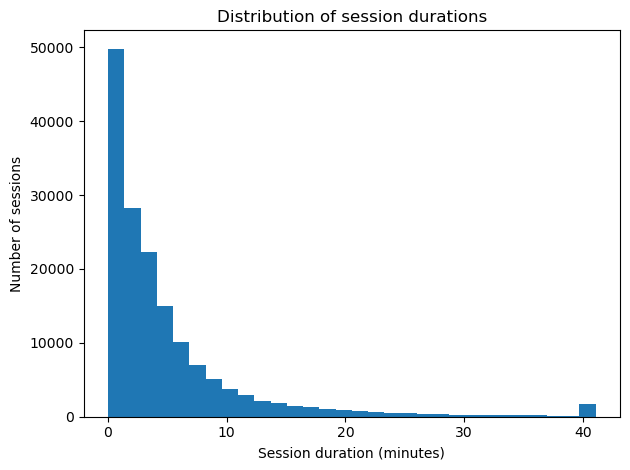

In [ ]:
# Distribution of session time spent (visit duration in minutes)
keys = ['client_id'] + (['visit_id'] if 'visit_id' in df.columns else [])
dur = (df.groupby(keys)['date_time']
         .agg(start='min', end='max')
         .assign(duration_min=lambda x: (x['end'] - x['start']).dt.total_seconds()/60)
         .reset_index())

plt.figure()
vals = dur['duration_min'].dropna()
if len(vals) == 0:
    print("No durations to plot (check date_time and visit_id).")
else:
    # cap extreme durations to make the histogram readable
    cap = np.nanpercentile(vals, 99)
    vals_clipped = np.clip(vals, 0, cap)
    plt.hist(vals_clipped, bins=30)
    plt.title('Distribution of session durations')
    plt.xlabel('Session duration (minutes)')
    plt.ylabel('Number of sessions')
    plt.tight_layout()
    plt.show()

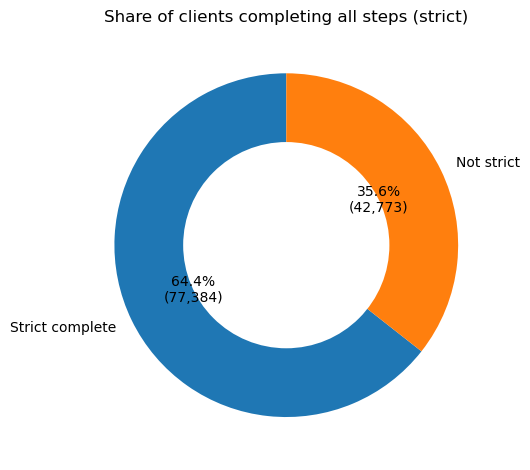

Total unique clients: 120,157
Strict complete:      77,384
Not strict:           42,773


In [ ]:
# Amount of clients who completed all steps in order within a visit
STEP_ORDER = ['start','step_1','step_2','step_3','confirm']

# --- 1) Recompute strict completers (per visit), then dedupe to client-level
df = df_final[['client_id','visit_id','process_step','date_time']].copy()
df = df.dropna(subset=['client_id','process_step','date_time'])
df['date_time'] = pd.to_datetime(df['date_time'], errors='coerce')
df = df.dropna(subset=['date_time'])

# Work at visit granularity when visit_id exists; otherwise fall back to client-only
step_keys = ['client_id'] + (['visit_id'] if 'visit_id' in df.columns else [])

first_times = (df.sort_values('date_time')
               .drop_duplicates(subset=step_keys+['process_step'], keep='first')
               .set_index(step_keys + ['process_step'])['date_time']
               .unstack('process_step')
               .reindex(columns=STEP_ORDER))

strict_clients = pd.Index([])
if first_times.shape[0] > 0:
    mask_all   = first_times[STEP_ORDER].notna().all(axis=1)
    mask_order = (first_times[STEP_ORDER].diff(axis=1).iloc[:, 1:] > pd.Timedelta(0)).all(axis=1)
    valid_visits   = first_times.loc[mask_all & mask_order].reset_index()
    strict_clients = valid_visits['client_id'].drop_duplicates()

strict_count = int(strict_clients.nunique())

# Base = all unique clients seen in df_final (any step)
total_clients = int(df_final['client_id'].dropna().nunique())
not_strict    = max(total_clients - strict_count, 0)

vals   = [strict_count, not_strict]
labels = ['Strict complete', 'Not strict']

# Donut share (percent of clients)
fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(
    vals,
    labels=labels,
    autopct=lambda p: f'{p:.1f}%\n({int(round(p*total_clients/100)):,})',
    startangle=90
)
# donut hole
centre = plt.Circle((0,0), 0.6, fc='white')
fig.gca().add_artist(centre)
ax.set_title('Share of clients completing all steps (strict)')
plt.tight_layout(); plt.show()

print(f"Total unique clients: {total_clients:,}")
print(f"Strict complete:      {strict_count:,}")
print(f"Not strict:           {not_strict:,}")

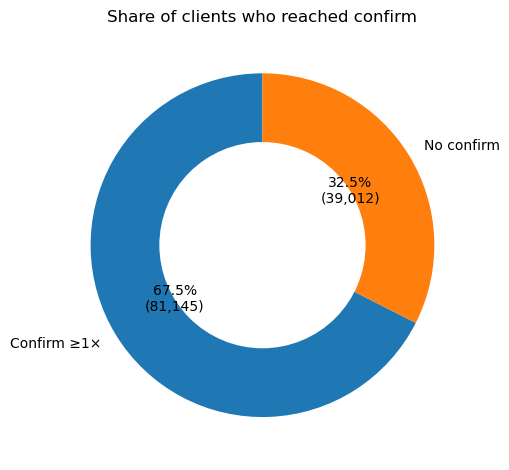

In [ ]:
# Amount of clients who reached confirm at least once (within walking all the steps)
d = df_final[['client_id','process_step']].dropna(subset=['client_id']).copy()
n_total   = d['client_id'].nunique()
n_confirm = d.loc[d['process_step'].eq('confirm'), 'client_id'].drop_duplicates().nunique()
n_no_conf = n_total - n_confirm
vals = [n_confirm, n_no_conf]
labels = ['Confirm ≥1×', 'No confirm']

fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(
    vals, labels=labels, autopct=lambda p: f'{p:.1f}%\n({int(round(p*n_total/100)):,})',
    startangle=90
)
# donut hole
centre = plt.Circle((0,0), 0.6, fc='white')
fig.gca().add_artist(centre)
ax.set_title('Share of clients who reached confirm')
plt.tight_layout(); plt.show()

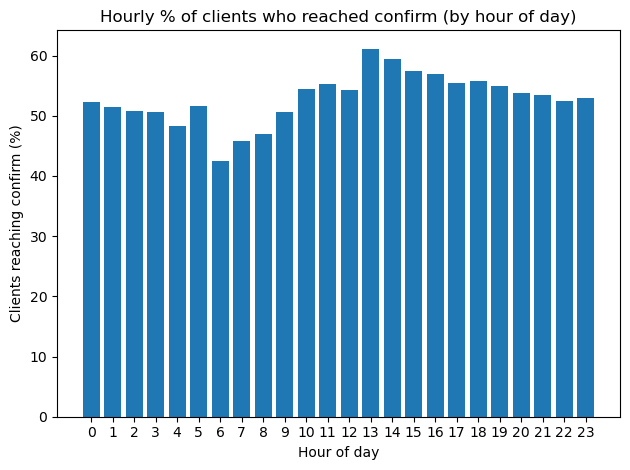

Average hourly confirm rate (%): 52.86


In [ ]:
d = df_final[['client_id','process_step','date_time']].dropna(subset=['client_id','date_time']).copy()
d['date_time'] = pd.to_datetime(d['date_time'], errors='coerce', utc=True).dt.tz_convert('Europe/Amsterdam')
d = d.dropna(subset=['date_time'])

# Hour of day (0..23)
d['hour'] = d['date_time'].dt.hour

# Denominator: unique active clients per hour-of-day (any step)
base = d.groupby('hour')['client_id'].nunique()

# Numerator: unique clients who reached 'confirm' in that hour-of-day
conf = (d.loc[d['process_step'].eq('confirm')]
          .groupby('hour')['client_id']
          .nunique())

# % reaching confirm per hour-of-day
rate = (conf.reindex(range(24), fill_value=0) / base.reindex(range(24), fill_value=0).replace(0, pd.NA) * 100).fillna(0)

# Plot (bar)
plt.figure()
plt.bar(rate.index, rate.values)
plt.xticks(range(24))
plt.xlabel('Hour of day'); plt.ylabel('Clients reaching confirm (%)')
plt.title('Hourly % of clients who reached confirm (by hour of day)')
plt.tight_layout(); plt.show()

print("Average hourly confirm rate (%):", round(rate.mean(), 2))

## EDA 

### Client behavior analysis
- Who are the primary clients using this online process?

From the age-distribution charts, usage is concentrated among adults 25–64. The single largest group is 55–64 (about 21,2%), closely followed by 25–34 and 45–54 (each about 20,5%). 35–44 is the next sizable band (about 16.5%). Younger clients 18–24 and older 75+ are small minorities, and <18 is negligible (about 22% combined)

- Are the primary clients younger or older, new or long-standing?

From the clients-tenure graph we can observe that: The primary age group is: 55–64 (21.2% of online clients) are older and The primary tenure group is: 10+ (55.2% of online clients) are long-standing

To re-inforce the answer, here is a more accurate graph per age group and tenure-year

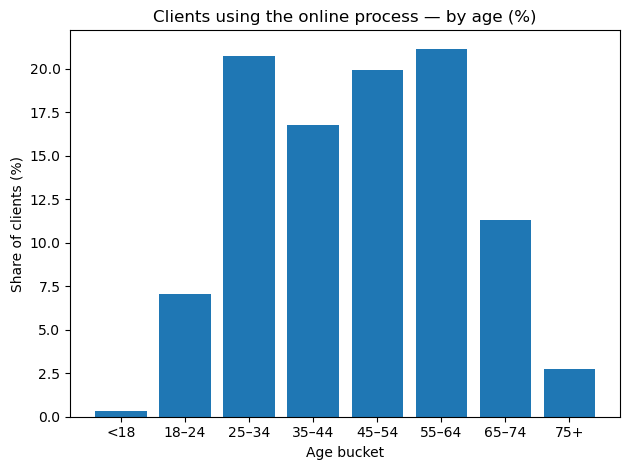

In [204]:
# Age buckets (adjust if you want different bands)
age_bins   = [0, 17, 24, 34, 44, 54, 64, 74, 120]
age_labels = ['<18','18–24','25–34','35–44','45–54','55–64','65–74','75+']

online_demo['age_bucket'] = pd.cut(online_demo[age_col], bins=age_bins, labels=age_labels, right=True)
age_counts = online_demo['age_bucket'].value_counts().reindex(age_labels).fillna(0).astype(int)
age_pct    = (age_counts / age_counts.sum()).fillna(0).mul(100)

# Percentages
plt.figure()
plt.bar(age_pct.index, age_pct.values)
plt.title('Clients using the online process — by age (%)')
plt.xlabel('Age bucket'); plt.ylabel('Share of clients (%)')
plt.tight_layout(); plt.show()


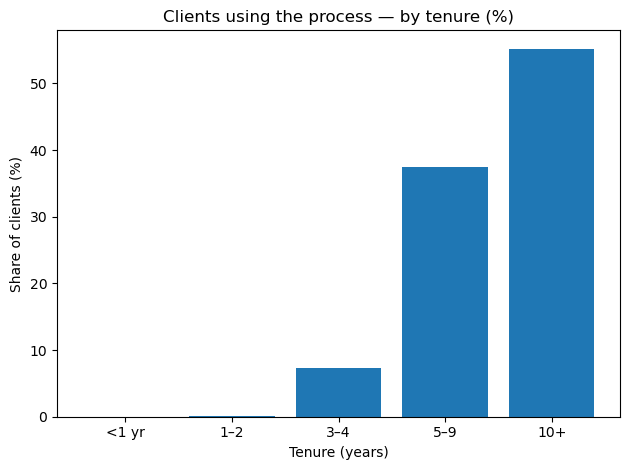

In [205]:
# Tenure buckets (years)
ten_bins   = [-0.01, 0.99, 2.99, 4.99, 9.99, 100]
ten_labels = ['<1 yr','1–2','3–4','5–9','10+']

online_demo['tenure_bucket'] = pd.cut(online_demo[ten_col], bins=ten_bins, labels=ten_labels, right=True)
ten_counts = online_demo['tenure_bucket'].value_counts().reindex(ten_labels).fillna(0).astype(int)
ten_pct    = (ten_counts / ten_counts.sum()).fillna(0).mul(100)

# Percentages
plt.figure()
plt.bar(ten_pct.index, ten_pct.values)
plt.title('Clients using the process — by tenure (%)')
plt.xlabel('Tenure (years)'); plt.ylabel('Share of clients (%)')
plt.tight_layout(); plt.show()


## KPIs & Metrics

#### Completion Rate: The proportion of users who reach the final 'confirm' step.

- Average daily percentage of clients who reach confirm: ~53.8% 

- Clients who reached confirm at least once: 81,145

- Clients who completed the full funnel in order (start→1→2→3→confirm): 77,384 → ~95% of confirmers followed the intended path (77,384 / 81,145 ≈ 95.4%)

In [206]:
# Define the order of steps

STEP_ORDER = ['start','step_1','step_2','step_3','confirm']

# Keep only the columns we need, clean basics
df_steps = (df_footprints_combined
            .dropna(subset=['client_id','process_step','date_time'])
            .copy())
df_steps['date_time'] = pd.to_datetime(df_steps['date_time'], errors='coerce')

# First occurrence of each step per client → wide table
wide_client = (df_steps
    .sort_values(['client_id','date_time'])
    .groupby(['client_id','process_step'])['date_time'].min()
    .unstack('process_step')
    .reindex(columns=STEP_ORDER)
    .reset_index())

# Boolean "seen" columns
for s in STEP_ORDER:
    wide_client[f'{s}_done'] = wide_client[s].notna()

display(wide_client.head())

process_step,client_id,start,step_1,step_2,step_3,confirm,start_done,step_1_done,step_2_done,step_3_done,confirm_done
0,169,2017-04-12 22:19:36+02:00,2017-04-12 22:19:45+02:00,2017-04-12 22:20:31+02:00,2017-04-12 22:22:05+02:00,2017-04-12 22:23:09+02:00,True,True,True,True,True
1,336,2017-06-01 09:26:55+02:00,NaT,NaT,NaT,NaT,True,False,False,False,False
2,546,2017-06-17 12:03:29+02:00,2017-06-17 12:03:39+02:00,2017-06-17 12:03:52+02:00,2017-06-17 12:05:19+02:00,2017-06-17 12:05:42+02:00,True,True,True,True,True
3,555,2017-04-15 14:57:56+02:00,2017-04-15 14:58:03+02:00,2017-04-15 14:58:35+02:00,2017-04-15 15:00:14+02:00,2017-04-15 15:00:34+02:00,True,True,True,True,True
4,647,2017-04-12 17:41:28+02:00,2017-04-12 17:41:35+02:00,2017-04-12 17:41:53+02:00,2017-04-12 17:45:02+02:00,2017-04-12 17:47:45+02:00,True,True,True,True,True


In [207]:
# Clietns who completed all the visits in chronological order

# First timestamp of each step within each (client, visit)
first_times = (df_steps
    .sort_values('date_time')
    .drop_duplicates(subset=['client_id','visit_id','process_step'], keep='first')
    .set_index(['client_id','visit_id','process_step'])['date_time']
    .unstack('process_step')
    .reindex(columns=STEP_ORDER))

# Condition A: all steps exist
mask_all = first_times[STEP_ORDER].notna().all(axis=1)

# Condition B: steps happened in the correct order (strictly increasing times)
# (check that each step time is later than the previous step time)
mask_order = (first_times[STEP_ORDER].diff(axis=1).iloc[:, 1:] > pd.Timedelta(0)).all(axis=1)

# Keep visits that satisfy both
valid_visits = first_times.loc[mask_all & mask_order].reset_index()[['client_id','visit_id']]

# If you want the unique list of clients who have at least one valid visit:
clients_completed = valid_visits['client_id'].drop_duplicates().reset_index(drop=True)

display(valid_visits.head())     # (client_id, visit_id) that completed the funnel in order
display(clients_completed.head()) # client_ids who completed at least once

process_step,client_id,visit_id
0,169,749567106_99161211863_557568
1,546,731811517_9330176838_94847
2,555,637149525_38041617439_716659
3,647,40369564_40101682850_311847
4,722,984487154_55831795985_521110


0    169
1    546
2    555
3    647
4    722
Name: client_id, dtype: int64

In [208]:
# Clients who have reached the 'confirm' step at least once
clients_reached_confirm = (
    df_footprints_combined.loc[df_footprints_combined['process_step'] == 'confirm', 'client_id']
    .dropna()                # drop missing client_id if any
    .drop_duplicates()       # keep only unique client_ids
    .reset_index(drop=True)  # tidy index
)

print("Number of clients who reached confirm:", len(clients_reached_confirm))
display(clients_reached_confirm.head())

Number of clients who reached confirm: 81145


0    8320017
1    4033851
2    1982004
3    3170143
4    6651403
Name: client_id, dtype: int64

#### Time Spent on Each Step: The average duration users spend on each step.

- Median session duration ≈ 2.8 min (short overall)
- start: 1.02 min step 1: 1.03 min step 2: 1.55 min step 3: 2.19 min confirm: 3.23 min

 avg_min = average time users spend on that step (skewed by long outliers).
 median_min = typical time (more robust)

In [209]:
# Sort, then compute gap within each visit
df_footprints_combined = df_footprints_combined.sort_values(['client_id','visit_id','date_time']).copy()
df_footprints_combined['time_gap'] = (
    df_footprints_combined
      .groupby(['client_id','visit_id'])['date_time']
      .diff()
)

display(df_footprints_combined)

,client_id,visitor_id,visit_id,process_step,date_time,time_gap
285515,169,201385055_71273495308,749567106_99161211863_557568,start,2017-04-12 22:19:36+02:00,NaT
285514,169,201385055_71273495308,749567106_99161211863_557568,step_1,2017-04-12 22:19:45+02:00,0 days 00:00:09
285513,169,201385055_71273495308,749567106_99161211863_557568,step_2,2017-04-12 22:20:31+02:00,0 days 00:00:46
285512,169,201385055_71273495308,749567106_99161211863_557568,step_3,2017-04-12 22:22:05+02:00,0 days 00:01:34
285511,169,201385055_71273495308,749567106_99161211863_557568,confirm,2017-04-12 22:23:09+02:00,0 days 00:01:04
...,...,...,...,...,...,...
648533,9999875,738878760_1556639849,931268933_219402947_599432,step_1,2017-06-02 00:40:08+02:00,0 days 00:00:07
648532,9999875,738878760_1556639849,931268933_219402947_599432,step_1,2017-06-02 00:41:28+02:00,0 days 00:01:20
648531,9999875,738878760_1556639849,931268933_219402947_599432,step_2,2017-06-02 00:41:47+02:00,0 days 00:00:19
648530,9999875,738878760_1556639849,931268933_219402947_599432,step_3,2017-06-02 00:44:58+02:00,0 days 00:03:11


In [210]:
STEP_ORDER = ['start', 'step_1', 'step_2', 'step_3', 'confirm']

# Use only what we need and make sure datetimes are parsed
cols_needed = ['client_id','visit_id','process_step','date_time']
df = df_footprints_combined[cols_needed].dropna(subset=['client_id','process_step','date_time']).copy()
df['date_time'] = pd.to_datetime(df['date_time'], errors='coerce')
df = df.dropna(subset=['date_time'])

# Sort within each visit
df = df.sort_values(['client_id','visit_id','date_time'])

# OPTIONAL: drop consecutive duplicates of the same step inside a visit
# (so we measure time from a step to the next *different* step)
prev_step = df.groupby(['client_id','visit_id'])['process_step'].shift()
df = df[df['process_step'] != prev_step].copy()

# Time until the next event in the same visit (i.e., duration of the *current* step)
df['next_time'] = df.groupby(['client_id','visit_id'])['date_time'].shift(-1)
df['step_duration_sec'] = (df['next_time'] - df['date_time']).dt.total_seconds()

# Keep only positive, finite durations
df = df[np.isfinite(df['step_duration_sec']) & (df['step_duration_sec'] > 0)].copy()

# Convert to minutes for readability
df['step_duration_min'] = df['step_duration_sec'] / 60.0

# Aggregate: mean/median duration per step
summary = (df.groupby('process_step')['step_duration_min']
             .agg(count='count', avg_min='mean', median_min='median')
             .round({'avg_min':2, 'median_min':2})
          )

# Order steps nicely
summary = summary.reindex([s for s in STEP_ORDER if s in summary.index])

print(summary)

               count  avg_min  median_min
process_step                             
start         141888     1.02        0.22
step_1        141677     1.03        0.43
step_2        123056     1.55        1.07
step_3         99391     2.19        1.02
confirm         1677     3.23        1.25


#### Error Rates: If there's a step where users go back to a previous step, it may indicate confusion or an error. You should consider moving from a later step to an earlier one as an error.

- Step 1 -> start, is the most common error/confusion with over 2000 users
- Step 2 -> step 1, is the next common error/confusion with around 1300 users
- Step 3 -> step 2, error/consufion with around 1000 users
- Setp 3 -> start, error/confusion with around 8000 users
- Step 2 -> start, error/confusion with over 5000 users
- And other steps with less than 1000 users

In [ ]:
# ---- Setup
STEP_ORDER = ['start','step_1','step_2','step_3','confirm']
rank = {s:i for i,s in enumerate(STEP_ORDER)}

# ---- Minimal prep
cols = ['client_id','visit_id','process_step','date_time']
df = df_footprints_combined[cols].dropna(subset=['client_id','process_step','date_time']).copy()
df = df[df['process_step'].isin(STEP_ORDER)]
df['date_time'] = pd.to_datetime(df['date_time'], errors='coerce')
df = df.dropna(subset=['date_time']).sort_values(['client_id','visit_id','date_time'])

# ---- Build transitions (current -> next within each visit)
df['next_step'] = df.groupby(['client_id','visit_id'])['process_step'].shift(-1)

# Keep only valid transitions
trans = df.dropna(subset=['next_step']).copy()
trans['from_rank'] = trans['process_step'].map(rank)
trans['to_rank']   = trans['next_step'].map(rank)
trans = trans.dropna(subset=['from_rank','to_rank'])

# ---- Backward flag
trans['is_error'] = trans['to_rank'] < trans['from_rank']

In [ ]:
# ---------- Overall error rate ----------
total_transitions = len(trans)
total_errors = int(trans['is_error'].sum())
overall_error_rate = (total_errors / total_transitions) if total_transitions else 0.0

print(f"Total transitions: {total_transitions:,}")
print(f"Backward (error) transitions: {total_errors:,}  ({overall_error_rate:.2%})")

Total transitions: 585,529
Backward (error) transitions: 62,880  (10.74%)


In [ ]:
# ---------- Error rate by 'from' step (where users retreated from) ----------
by_from = (trans
    .groupby('process_step')['is_error']
    .agg(errors='sum', transitions='count'))
by_from['error_rate'] = by_from['errors'] / by_from['transitions']
by_from = by_from.reset_index().sort_values('error_rate', ascending=False)
print("\nError rate by FROM step (descending):")
print(by_from)


Error rate by FROM step (descending):
  process_step  errors  transitions  error_rate
4       step_3   19320       103159    0.187284
2       step_1   23587       149164    0.158128
3       step_2   18111       126809    0.142821
0      confirm    1862        13634    0.136570
1        start       0       192763    0.000000


In [ ]:
# ---------- Top backward pairs (from→to) ----------
trans['pair'] = trans['process_step'] + '→' + trans['next_step']
back_pairs = (trans.loc[trans['is_error'], 'pair']
              .value_counts()
              .rename_axis('pair')
              .reset_index(name='count'))
print("\nTop backward pairs:")
print(back_pairs.head(10))


Top backward pairs:
             pair  count
0    step_1→start  23587
1   step_2→step_1  12171
2   step_3→step_2   9418
3    step_3→start   8265
4    step_2→start   5940
5   step_3→step_1   1637
6   confirm→start   1109
7  confirm→step_1    552
8  confirm→step_3    194
9  confirm→step_2      7


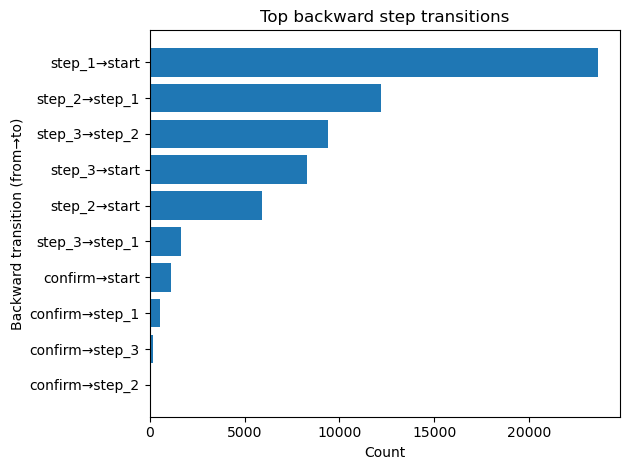

In [ ]:
# ---------- OPTIONAL: visualize top backward pairs ----------
if not back_pairs.empty:
    top = back_pairs.head(10).iloc[::-1]  # reverse for horizontal bar
    plt.figure()
    plt.barh(top['pair'], top['count'])
    plt.xlabel('Count'); plt.ylabel('Backward transition (from→to)')
    plt.title('Top backward step transitions')
    plt.tight_layout(); plt.show()

#### Redesign Outcome

Based on the chosen KPIs, how does the new design's performance compare to the old one?

Control vs Test: Control = old design and Test = new design (variation_cleaned column), comparing KPIs per variation.

- Completion rate: confirmers / unique active clients (same period).
- Error rate: backward-move rate.
- Time per step: median per step.

“Given (lower) higher completion rate, (faster) similar step times, and (lower/equal) similar error rates, the new design is not yet recommended.”

- Completion rate: “Across the test (new design) variant, completion rate was 65.59% vs 69.29% in control, new desing "wins".”
- Time per step: “Median time on the slowest step (Step k) fell from A min (control) to B min (test).”
- Error rate: “Backward-move rate dropped from E% (control) to F% (test).”

Decision rule: New design “wins” if it increases completion rate and reduces (or doesn’t worsen) errors, without increasing time on critical steps. If completion uplift is modest, check that it’s paired with a lower error rate or faster key steps.

In [217]:
df = df_final[['client_id','process_step','date_time','variation_cleaned']].dropna(subset=['client_id','variation_cleaned']).copy()
df['date_time'] = pd.to_datetime(df['date_time'], errors='coerce')
df = df.dropna(subset=['date_time'])
df['variation_cleaned'] = df['variation_cleaned'].str.lower().map({'control':'control','test':'test'}).fillna('unknown')

# Completion rate per variation (unique clients who confirmed / unique active clients)
active = df.groupby('variation_cleaned')['client_id'].nunique()
confirmed = (df[df['process_step'].eq('confirm')]
             .groupby('variation_cleaned')['client_id']
             .nunique())
cr = (confirmed / active).mul(100).round(2)

# Error (backward) rate per variation
STEP_ORDER = ['start','step_1','step_2','step_3','confirm']
rank = {s:i for i,s in enumerate(STEP_ORDER)}
# need visit_id; fall back to client_id if not present
keys = ['client_id','visit_id'] if 'visit_id' in df_final.columns else ['client_id']
err_df = (df_final[['client_id','visit_id','process_step','date_time']]
          .merge(df[['client_id','variation_cleaned']].drop_duplicates('client_id'),
                 on='client_id', how='left'))
err_df = err_df.dropna(subset=['process_step','date_time'])
err_df['date_time'] = pd.to_datetime(err_df['date_time'], errors='coerce')
err_df = err_df[err_df['process_step'].isin(STEP_ORDER)].sort_values(keys+['date_time'])
err_df['next_step'] = err_df.groupby(keys)['process_step'].shift(-1)
trans = err_df.dropna(subset=['next_step']).copy()
trans['from_rank'] = trans['process_step'].map(rank)
trans['to_rank']   = trans['next_step'].map(rank)
trans = trans.dropna(subset=['from_rank','to_rank'])
trans['is_error'] = trans['to_rank'] < trans['from_rank']
er = trans.groupby('variation_cleaned')['is_error'].mean().mul(100).round(2)

# Median time per step per variation (minutes)
step_df = err_df.sort_values(keys+['date_time']).copy()
step_df['next_time'] = step_df.groupby(keys)['date_time'].shift(-1)
step_df['next_step'] = step_df.groupby(keys)['process_step'].shift(-1)
step_df = step_df[step_df['next_time'].notna()]
step_df['dur_min'] = (step_df['next_time'] - step_df['date_time']).dt.total_seconds() / 60
step_median = (step_df.groupby(['variation_cleaned','process_step'])['dur_min']
               .median().unstack('process_step').round(2))

print("Completion rate (%):\n", cr, "\n")
print("Backward (error) rate (%):\n", er, "\n")
print("Median minutes per step:\n", step_median, "\n")

# Simple verdict
try:
    uplift = cr.get('test', np.nan) - cr.get('control', np.nan)
    err_delta = er.get('test', np.nan) - er.get('control', np.nan)
    verdict = ("✅ New design (test) outperforms control"
               if (pd.notna(uplift) and uplift > 0) and (pd.isna(err_delta) or err_delta <= 0)
               else "⚠️ New design doesn’t clearly beat control")
    print(f"Completion uplift (test-control): {uplift:.2f} pp; Error delta: {err_delta:.2f} pp → {verdict}")
except Exception:
    pass


Completion rate (%):
 variation_cleaned
control    65.59
test       69.29
unknown    68.02
Name: client_id, dtype: float64 

Backward (error) rate (%):
 variation_cleaned
control     8.85
test       11.64
unknown    10.39
Name: is_error, dtype: float64 

Median minutes per step:
 process_step       confirm  start  step_1  step_2  step_3
variation_cleaned                                        
control               0.77   0.33    0.33    1.07    1.20
test                  1.55   0.23    0.45    1.02    0.97
unknown               1.23   0.27    0.40    1.05    1.07 

Completion uplift (test-control): 3.70 pp; Error delta: 2.79 pp → ⚠️ New design doesn’t clearly beat control
